<a href="https://colab.research.google.com/github/tehrimzahra/00_edges_nodes_graph.ipynb/blob/main/Agentic_AI_Chatbot_Prototype_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture --no-stderr
!pip install -U langgraph langsmith langchain_anthropic

In [ ]:
def _set_env(var: str):
    if not os.environ.get(var):
        print(f"Setting environment variable: {var}")
        os.environ[var] = getpass.getpass(f"{var}: ")


In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [ ]:
from langchain_anthropic import ChatAnthropic

llm = ChatAnthropic(model="claude-3-5-sonnet-20240620")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [ ]:
graph_builder.add_edge(START, "chatbot")

In [ ]:
graph_builder.add_edge("chatbot", END)

In [ ]:
graph = graph_builder.compile()

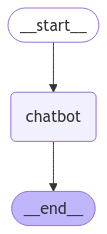

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
config = {"configurable": {"thread_id": "1"}}

In [ ]:
import os
import getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# Example function to handle chatbot messages
def chatbot(state):
    user_message = state["messages"][-1]  # Get the latest user message

    # Check if the message contains health-related keywords
    health_keywords = ["health", "healthy", "exercise", "diet", "wellness", "sick", "ill", "medicine"]
    if any(keyword in user_message.lower() for keyword in health_keywords):
        # Respond to health-related questions
        llm_response = handle_health_question(user_message)
    else:
        # Default response for non-health-related messages
        llm_response = "I'm here to help! Can you clarify or ask something else?"

    return {"messages": state["messages"] + [llm_response]}

def handle_health_question(question):
    # Basic health-related responses
    if "exercise" in question.lower():
        return "Regular exercise, like walking, jogging, or yoga, is great for overall health. Aim for at least 30 minutes most days of the week!"
    elif "diet" in question.lower():
        return ("A balanced diet includes fruits, vegetables, lean proteins, and whole grains. "
                "Drink plenty of water and limit processed foods for optimal health.")
    elif "sick" in question.lower() or "ill" in question.lower():
        return "If you're feeling unwell, rest and stay hydrated. If symptoms persist or worsen, consult a healthcare professional."
    elif "medicine" in question.lower():
        return "Always take medications as prescribed by your doctor. If you have questions about medication, consult a pharmacist or healthcare provider."
    elif "mental health" in question.lower():
        return ("Mental health is important! Practice self-care, talk to trusted friends or family, "
                "and consider reaching out to a counselor or therapist if you're struggling.")
    else:
        return "For general health questions, it's always best to consult with a healthcare professional. I'm here to guide you with basic tips."

# Example state structure for testing
state = {
    "messages": ["What are some good exercises to stay healthy?"]
}

# Test the chatbot function
response = chatbot(state)
print(response["messages"][-1])


Regular exercise, like walking, jogging, or yoga, is great for overall health. Aim for at least 30 minutes most days of the week!


In [ ]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [ ]:
user_input = "Remember my name?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember my name?


TypeError: "Could not resolve authentication method. Expected either api_key or auth_token to be set. Or for one of the `X-Api-Key` or `Authorization` headers to be explicitly omitted"